In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [2]:
%matplotlib inline

plt.rcParams['figure.figsize'] = (12,12)

In [6]:
air = pd.read_pickle("data/airbnb.pkl")

In [7]:
air.dtypes

room_id                   int64
host_id                   int64
room_type                object
neighborhood             object
reviews                   int64
overall_satisfaction    float64
accommodates              int64
bedrooms                float64
price                   float64
dtype: object

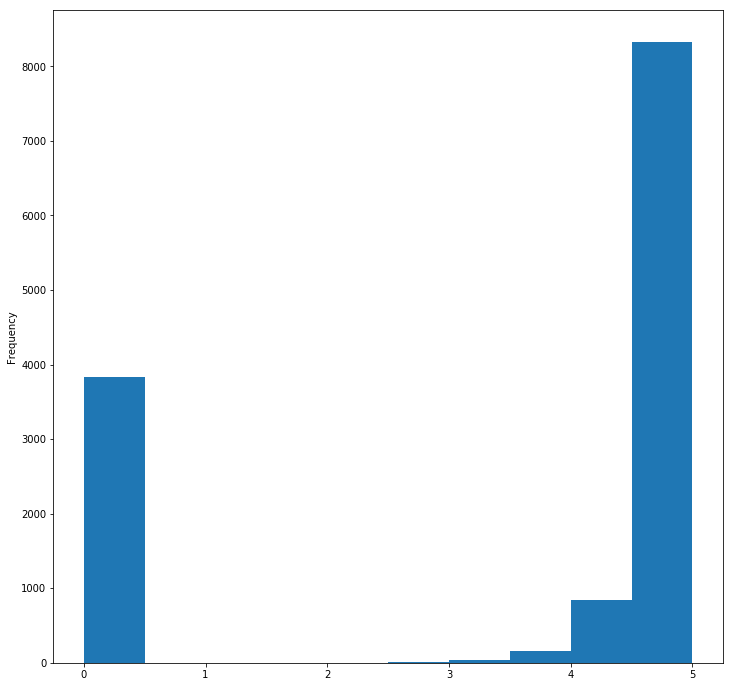

In [8]:
air['overall_satisfaction'].plot.hist();

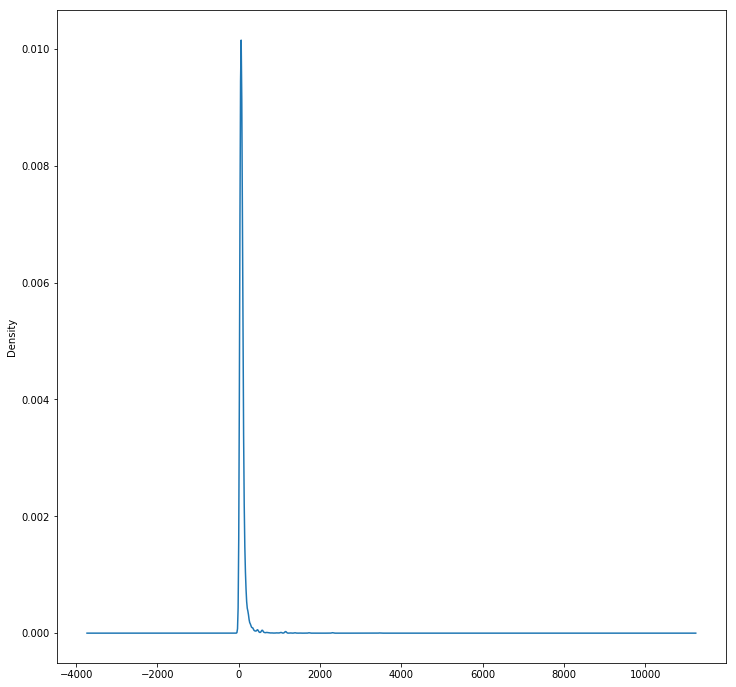

In [9]:
air['price'].plot.kde();

In [10]:
def numerical_variable_distribution(df, col):
    df[col].plot.kde()
    plt.xlabel('Variable "{}" Distribution'.format(col))
    plt.show()

In [11]:
numerical_columns = air.select_dtypes(np.number).columns.tolist()

In [12]:
from ipywidgets import interact, fixed

In [13]:
interact(numerical_variable_distribution, 
         col=numerical_columns, df=fixed(air));

interactive(children=(Dropdown(description='col', options=('room_id', 'host_id', 'reviews', 'overall_satisfact…

In [14]:
air['price'].value_counts(normalize=True)

58.0      0.058570
69.0      0.048065
52.0      0.040281
46.0      0.039677
40.0      0.037712
64.0      0.036729
93.0      0.034311
29.0      0.033026
75.0      0.031363
80.0      0.029852
35.0      0.027811
87.0      0.026149
115.0     0.024259
104.0     0.020859
23.0      0.018969
98.0      0.017533
57.0      0.016097
138.0     0.015190
45.0      0.013679
68.0      0.012621
173.0     0.012243
109.0     0.011185
79.0      0.009674
33.0      0.009296
56.0      0.009144
18.0      0.008540
32.0      0.008389
127.0     0.008086
48.0      0.007935
44.0      0.007633
            ...   
547.0     0.000076
271.0     0.000076
1267.0    0.000076
571.0     0.000076
43.0      0.000076
394.0     0.000076
311.0     0.000076
303.0     0.000076
357.0     0.000076
680.0     0.000076
264.0     0.000076
340.0     0.000076
152.0     0.000076
1130.0    0.000076
4037.0    0.000076
168.0     0.000076
494.0     0.000076
211.0     0.000076
339.0     0.000076
214.0     0.000076
1269.0    0.000076
495.0     0.

In [15]:
from scipy import stats

In [16]:
def numerical_variable_normality(col):
    stats.probplot(air[col], plot=plt)
    plt.xlabel('Probability plot for variable {}'.format(col))
    plt.show()

In [17]:
interact(numerical_variable_normality, col=numerical_columns);

interactive(children=(Dropdown(description='col', options=('room_id', 'host_id', 'reviews', 'overall_satisfact…

In [18]:
for num_col in numerical_columns:
    _, pval = stats.normaltest(air[num_col][air[num_col].notnull()])
    if(pval < 0.05):
        print("Column {} doesn't follow a normal distribution".format(num_col))

Column room_id doesn't follow a normal distribution
Column host_id doesn't follow a normal distribution
Column reviews doesn't follow a normal distribution
Column overall_satisfaction doesn't follow a normal distribution
Column accommodates doesn't follow a normal distribution
Column bedrooms doesn't follow a normal distribution
Column price doesn't follow a normal distribution


In [19]:
def categorical_variable_distribution(col):
    air[col].value_counts(ascending=True,normalize=True).tail(20).plot.barh()
    plt.show()

In [20]:
categorical_columns = air.select_dtypes(
    ['object', 'category']).columns.tolist()

In [21]:
interact(categorical_variable_distribution, col=categorical_columns);

interactive(children=(Dropdown(description='col', options=('room_type', 'neighborhood'), value='room_type'), O…

In [22]:
def pivot_count(df, rows, columns, calc_field):
    df_pivot = df.pivot_table(values=calc_field, 
                              index=rows, 
                              columns=columns, 
                              aggfunc=np.size
                             ).dropna(axis=0, how='all')
    return df_pivot

In [23]:
airbnb_satisfaction = pivot_count(air, "neighborhood","accommodates", "overall_satisfaction")
airbnb_satisfaction

accommodates,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
neighborhood,,,,,,,,,,,,,,,,
Ajuda,5.0,28.0,12.0,36.0,12.0,10.0,2.0,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Alcântara,10.0,72.0,17.0,65.0,13.0,21.0,3.0,6.0,1.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN
Alvalade,48.0,83.0,25.0,49.0,13.0,22.0,4.0,6.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
Areeiro,45.0,105.0,18.0,47.0,20.0,15.0,5.0,10.0,5.0,4.0,1.0,4.0,NaN,NaN,NaN,1.0
Arroios,122.0,645.0,123.0,344.0,97.0,155.0,30.0,56.0,15.0,30.0,4.0,18.0,1.0,8.0,1.0,15.0
Avenidas Novas,64.0,239.0,51.0,85.0,18.0,51.0,9.0,18.0,7.0,11.0,4.0,4.0,NaN,2.0,2.0,1.0
Beato,2.0,50.0,5.0,21.0,2.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Belém,5.0,53.0,28.0,87.0,22.0,39.0,5.0,6.0,1.0,6.0,NaN,1.0,NaN,NaN,NaN,1.0
Benfica,4.0,21.0,6.0,14.0,9.0,13.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [24]:
def heatmap_count_types(df, col1, col2):
    pivot_table = pivot_count(df,col1, col2, "overall_satisfaction")
    sns.heatmap(pivot_table, annot=True, fmt='g')
    plt.ylabel(col1)
    plt.xlabel(col2)
    plt.show()

In [26]:
interact(heatmap_count_types, col1=air.columns.drop(["neighborhood", "accommodates", "price"]),
                                 col2=air.columns.drop(["neighborhood", "accommodates", "price"]),
                                 df=fixed(air));

interactive(children=(Dropdown(description='col1', options=('room_id', 'host_id', 'room_type', 'reviews', 'ove…

In [30]:
def means_by_category(col_group, col_calc):
    air_no_outliers = air[air[col_calc]<air[col_calc].quantile(0.99)]
    air_no_outliers.groupby(col_group)[col_calc].mean().plot.barh()   
    plt.ylabel(col_group)
    plt.xlabel('Mean values for variable {}'.format(col_calc))
    plt.show()

In [31]:
numerical_variables = air.select_dtypes(np.number).columns
categorical_variables = air.select_dtypes(['object', 'category']).columns
columns_type = [col for col in air.columns if col.endswith("_type")]

In [32]:
interact(means_by_category, col_group=categorical_variables, col_calc=numerical_variables);

interactive(children=(Dropdown(description='col_group', options=('room_type', 'neighborhood'), value='room_typ…

In [33]:
def pivot_mean(rows, columns, calc_field):
    df_pivot = air.pivot_table(values=calc_field, 
                              index=rows, 
                              columns=columns, 
                              aggfunc=np.mean
                             ).dropna(axis=0, how='all')
    return df_pivot

In [34]:
pivot_mean("neighborhood","accommodates", "overall_satisfaction")

accommodates,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
neighborhood,,,,,,,,,,,,,,,,
Ajuda,2.900000,3.500000,4.583333,3.250000,4.291667,4.200000,4.500000,5.000000,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
Alcântara,1.900000,2.631944,3.058824,3.161538,3.230769,2.904762,1.500000,1.500000,4.500000,2.250000,0.000000,2.250000,NaN,NaN,NaN,NaN
Alvalade,2.208333,2.337349,2.980000,2.795918,2.807692,3.409091,4.750000,3.833333,0.000000,2.500000,NaN,NaN,NaN,NaN,NaN,NaN
Areeiro,1.044444,2.619048,1.805556,2.723404,3.000000,3.333333,1.800000,3.250000,1.800000,2.125000,0.000000,2.375000,NaN,NaN,NaN,0.000000
Arroios,2.348361,2.865683,3.162602,3.397661,3.329897,3.216129,2.400000,3.491071,3.466667,3.050000,2.250000,4.138889,0.00,3.4375,5.000000,3.166667
Avenidas Novas,1.750000,1.989540,3.009804,2.700000,3.166667,2.323529,2.944444,3.083333,2.714286,2.500000,3.500000,2.125000,NaN,4.2500,2.500000,0.000000
Beato,0.000000,3.250000,2.700000,3.928571,4.500000,2.250000,0.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Belém,2.900000,3.160377,2.642857,3.137931,3.613636,2.846154,2.900000,4.000000,5.000000,2.416667,NaN,0.000000,NaN,NaN,NaN,0.000000
Benfica,2.250000,2.285714,1.666667,2.392857,2.166667,2.153846,2.250000,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [35]:
def heatmap_means_types(col1, col2, col3):
    pivot_table = pivot_mean(col1, col2, col3)
    sns.heatmap(pivot_table, annot=True, fmt='g')
    plt.ylabel(col1)
    plt.xlabel(col2)
    plt.show()

In [36]:
interact(heatmap_means_types, col1=air.columns, col2=air.columns, col3=numerical_variables);

interactive(children=(Dropdown(description='col1', options=('room_id', 'host_id', 'room_type', 'neighborhood',…

In [37]:
air_nonzero_satisfaction = air.query("overall_satisfaction > 0")

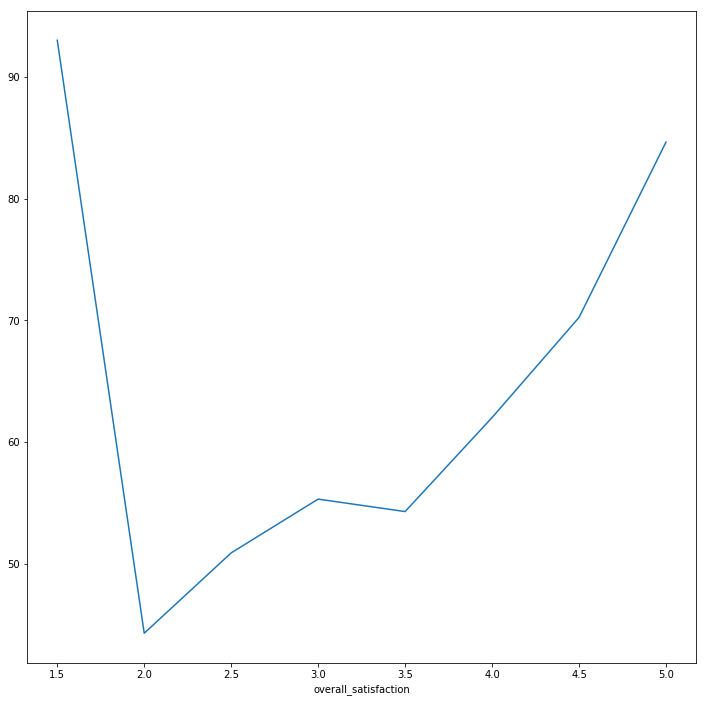

In [38]:
air.query("overall_satisfaction > 0").groupby('overall_satisfaction')['price'].mean().plot();

In [41]:
def mean_trend(col_calc):
    air_nonzero_satisfaction.groupby('accommodates')[col_calc].mean().plot()
    plt.ylabel(col_calc)
    plt.title("{} by accommodation level".format(col_calc))
    plt.show()

In [42]:
interact(mean_trend, col_calc=numerical_variables);

interactive(children=(Dropdown(description='col_calc', options=('room_id', 'host_id', 'reviews', 'overall_sati…

In [43]:
def count_trend(col_calc):
    for category in air_nonzero_satisfaction[col_calc].unique():
        n_air_neighborhood = air_nonzero_satisfaction[air_nonzero_satisfaction[col_calc]==category].groupby(
            'neighborhood').apply(np.size)
        try:
            plt.plot(
                n_air_neighborhood.index,
                n_air_neighborhood,
                label=category
            )
        except ZeroDivisionError:
            pass
        plt.legend()

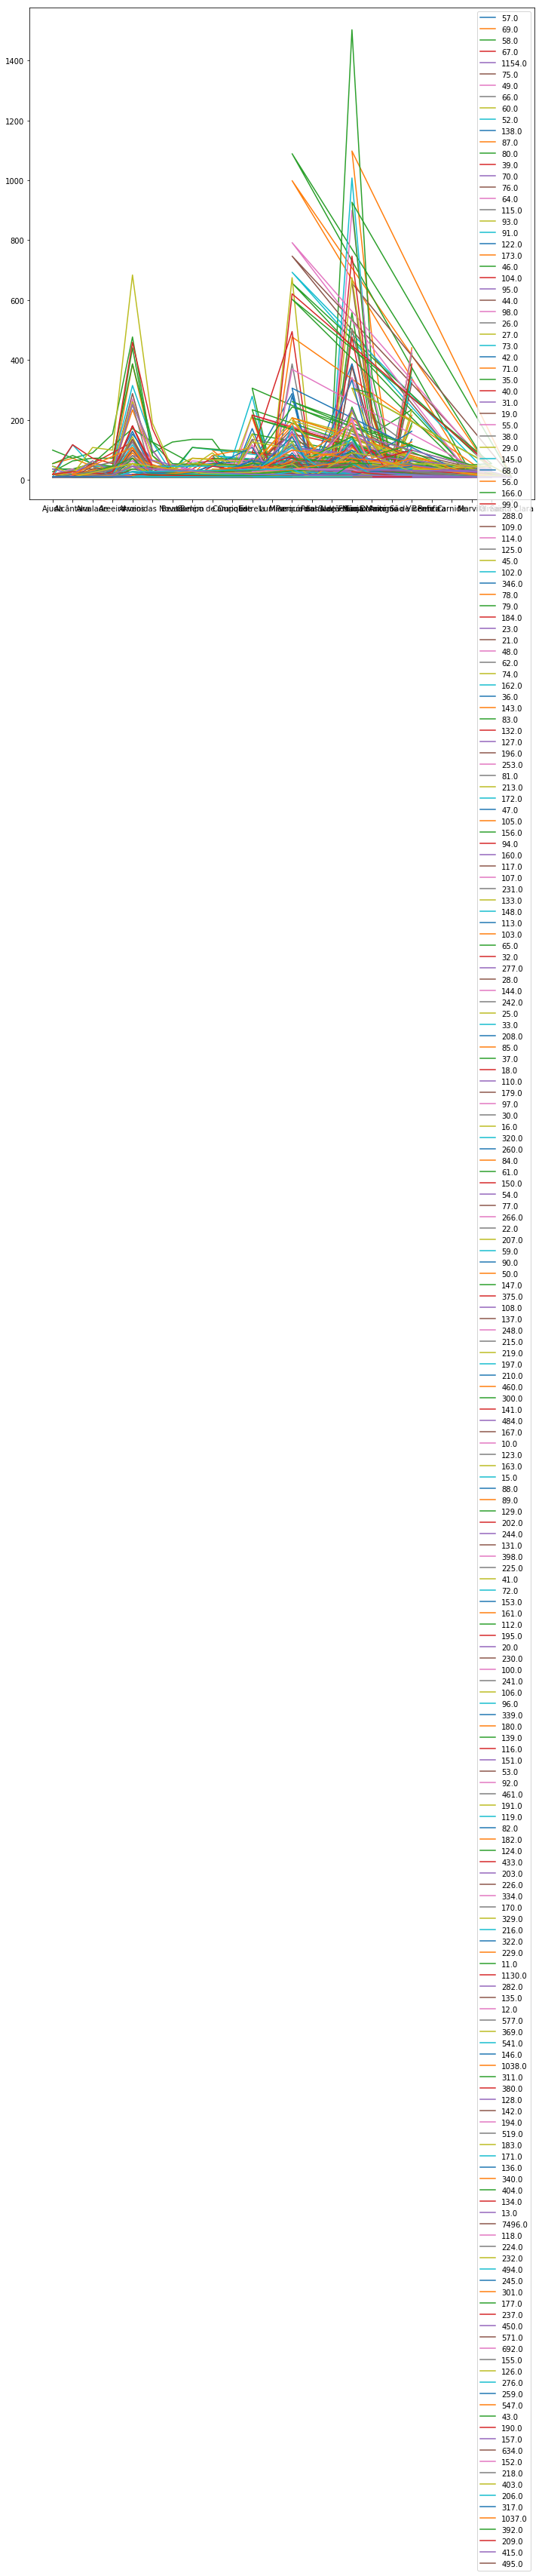

In [44]:
count_trend("price")

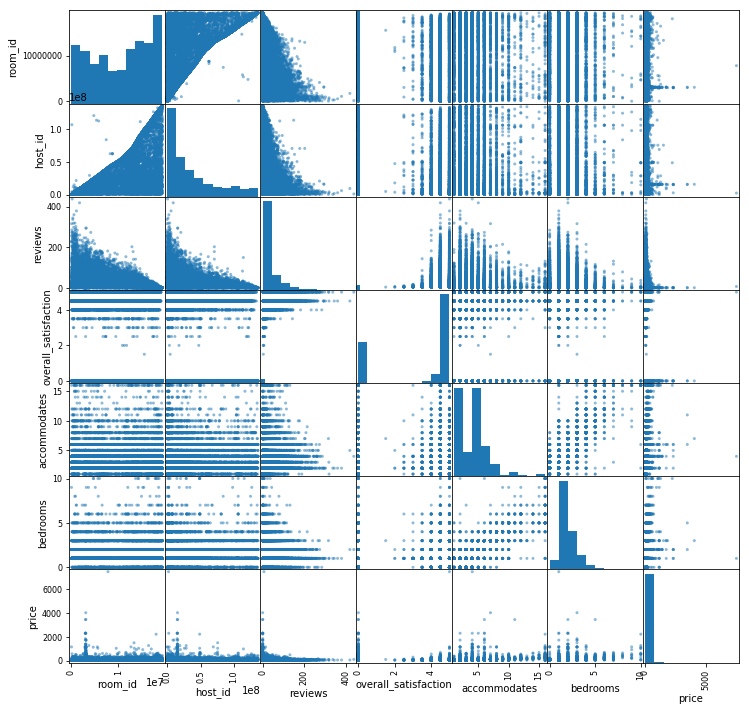

In [45]:
pd.plotting.scatter_matrix(air.select_dtypes([int, float]));

In [46]:
air.corr()

,room_id,host_id,reviews,overall_satisfaction,accommodates,bedrooms,price
room_id,1.000000,0.595750,-0.496113,-0.308531,-0.057226,-0.030635,-0.068688
host_id,0.595750,1.000000,-0.286024,-0.179272,-0.071530,-0.050984,-0.048030
reviews,-0.496113,-0.286024,1.000000,0.431755,0.007331,-0.043997,-0.084228
overall_satisfaction,-0.308531,-0.179272,0.431755,1.000000,0.078356,0.019189,-0.126767
accommodates,-0.057226,-0.071530,0.007331,0.078356,1.000000,0.791061,0.300386
bedrooms,-0.030635,-0.050984,-0.043997,0.019189,0.791061,1.000000,0.302463
price,-0.068688,-0.048030,-0.084228,-0.126767,0.300386,0.302463,1.000000


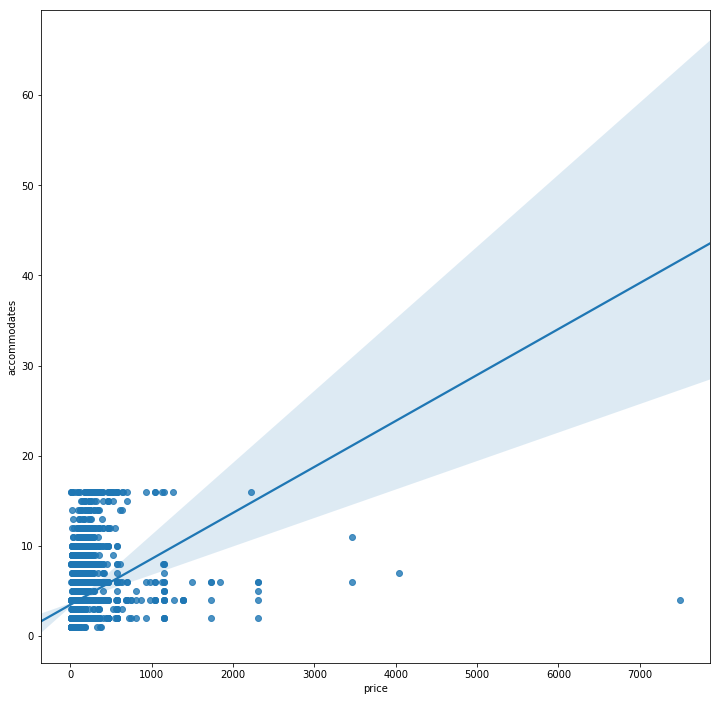

In [48]:
sns.regplot("price", "accommodates", data=air);

In [49]:
airDrop = air.drop_duplicates()

In [50]:
from scipy import stats
import numpy as np

def outliers_col(df):
    for column in df:
        if df[column].dtype != np.object:
            n_outliers = len(df[np.abs(stats.zscore(df[column])) > 3])    
            print("{} | {} | {}".format(
                df[column].name,
                n_outliers,
                df[column].dtype
        ))

outliers_col(airDrop)

room_id | 0 | int64
host_id | 0 | int64
reviews | 296 | int64
overall_satisfaction | 0 | float64
accommodates | 231 | int64
bedrooms | 258 | float64
price | 121 | float64


/home/brant/anaconda3/envs/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


In [51]:
airDrop.describe()

,room_id,host_id,reviews,overall_satisfaction,accommodates,bedrooms,price
count,1.323200e+04,1.323200e+04,13232.000000,13222.000000,13232.000000,13232.000000,13232.000000
mean,1.055081e+07,3.616444e+07,29.130063,3.284677,3.917775,1.549501,86.592352
std,6.069884e+06,3.706975e+07,42.802762,2.123236,2.293757,1.062821,135.208926
min,6.499000e+03,1.445500e+04,0.000000,0.000000,1.000000,0.000000,10.000000
25%,5.054848e+06,6.197930e+06,2.000000,0.000000,2.000000,1.000000,45.000000
50%,1.166226e+07,2.207571e+07,11.000000,4.500000,4.000000,1.000000,64.000000
75%,1.609631e+07,5.546697e+07,39.000000,5.000000,5.000000,2.000000,93.000000
max,1.940072e+07,1.359156e+08,438.000000,5.000000,16.000000,10.000000,7496.000000


In [63]:
price_min = airDrop.price.mean() - 3 * air.price.std()
price_max = airDrop.price.mean() + 3 * air.price.std()
print(price_min, price_max)

accommodates_min = air.accommodates.mean() - 3*air.accommodates.std()
accommodates_max = air.accommodates.mean() + 3*air.accommodates.std()
print(accommodates_min, accommodates_max)

-339.22580521282435 472.0277535328111
-2.963495851561822 10.799046032940298


In [64]:
airDrop = airDrop[
    (np.abs(stats.zscore(airDrop.price)) < 3)  & \
    (np.abs(stats.zscore(airDrop.accommodates)) < 3)
]

In [65]:
airDrop.shape

(12028, 9)

In [66]:
airDrop.describe

<bound method NDFrame.describe of         room_id    host_id        room_type             neighborhood  reviews  \
0          6499      14455  Entire home/apt                    Belém        8   
1         17031      66015  Entire home/apt                 Alvalade        0   
2         25659     107347  Entire home/apt        Santa Maria Maior       63   
3         29248     125768  Entire home/apt        Santa Maria Maior      225   
4         29396     126415  Entire home/apt        Santa Maria Maior      132   
6         29872     128698  Entire home/apt                Alcântara       25   
7         29891     128792  Entire home/apt             Misericórdia       28   
8         29915     128890  Entire home/apt           Avenidas Novas       28   
9         33312     144398  Entire home/apt             Misericórdia       24   
10        33348     144484     Private room                   Lumiar        2   
11        34783     149980     Private room                  Estrela       

In [67]:
outliers_col(airDrop)

room_id | 0 | int64
host_id | 0 | int64
reviews | 262 | int64
overall_satisfaction | 0 | float64
accommodates | 0 | int64
bedrooms | 156 | float64
price | 4 | float64


/home/brant/anaconda3/envs/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


In [68]:
n_records = len(airDrop)
def missing_values_col(df):
    for column in df:
        print("{} | {} | {}".format(
            column, len(df[df[column].isnull()]) / (1.0*n_records), df[column].dtype
        ))

missing_values_col(airDrop)

room_id | 0.0 | int64
host_id | 0.0 | int64
room_type | 0.0 | object
neighborhood | 0.0 | object
reviews | 0.0 | int64
overall_satisfaction | 0.0008313934153641503 | float64
accommodates | 0.0 | int64
bedrooms | 0.0 | float64
price | 0.0 | float64


In [69]:
airDrop_no_null = airDrop.dropna(subset=["room_id", "host_id", "room_type", "neighborhood", "reviews", "overall_satisfaction", "accommodates", "bedrooms", "price"])

airDrop_no_null.shape

(12018, 9)

In [70]:
airDrop["room_id_imp"] = airDrop.room_id.fillna(0)
airDrop["host_id_imp"] = airDrop.host_id.fillna(0)
airDrop["room_type_imp"] = airDrop.room_type.fillna(0)
airDrop["neighborhood_imp"] = airDrop.neighborhood.fillna(0)
airDrop["reviews_imp"] = airDrop.reviews.fillna(0)
airDrop["overall_satisfaction_imp"] = airDrop.overall_satisfaction.fillna(0)
airDrop["accommodates_imp"] = airDrop.accommodates.fillna(0)
airDrop["bedrooms_imp"] = airDrop.bedrooms.fillna(0)
airDrop["price_imp"] = airDrop.price.fillna(0)

airDrop.shape

(12028, 18)

In [71]:
room_id_mode = airDrop.room_id.mode().values[0]
host_id_mode = airDrop.host_id.mode().values[0]
room_type_mode = airDrop.room_type.mode().values[0]
neighborhood_mode = airDrop.neighborhood.mode().values[0]
reviews_mode = airDrop.reviews.mode().values[0]
overall_satisfaction_mode = airDrop.overall_satisfaction.mode().values[0]
accommodates_mode = airDrop.accommodates.mode().values[0]
bedrooms_mode = airDrop.bedrooms.mode().values[0]
price_mode = airDrop.price.mode().values[0]

airDrop.room_id = airDrop.room_id.fillna(room_id_mode)
airDrop.host_id = airDrop.host_id.fillna(host_id_mode)
airDrop.room_type = airDrop.room_type.fillna(room_type_mode)
airDrop.neighborhood = airDrop.neighborhood.fillna(neighborhood_mode)
airDrop.reviews = airDrop.reviews.fillna(reviews_mode)
airDrop.overall_satisfaction = airDrop.overall_satisfaction.fillna(overall_satisfaction_mode)
airDrop.accommodates = airDrop.accommodates.fillna(accommodates_mode)
airDrop.bedrooms = airDrop.bedrooms.fillna(bedrooms_mode)
airDrop.price = airDrop.price.fillna(price_mode)

In [74]:
airDrop = airDrop.drop(["room_id_imp", "host_id_imp", "room_type_imp", "neighborhood_imp", "reviews_imp", "overall_satisfaction_imp", "accommodates_imp", "bedrooms_imp", "price_imp"], 
                           axis=1)

In [75]:
from scipy import stats

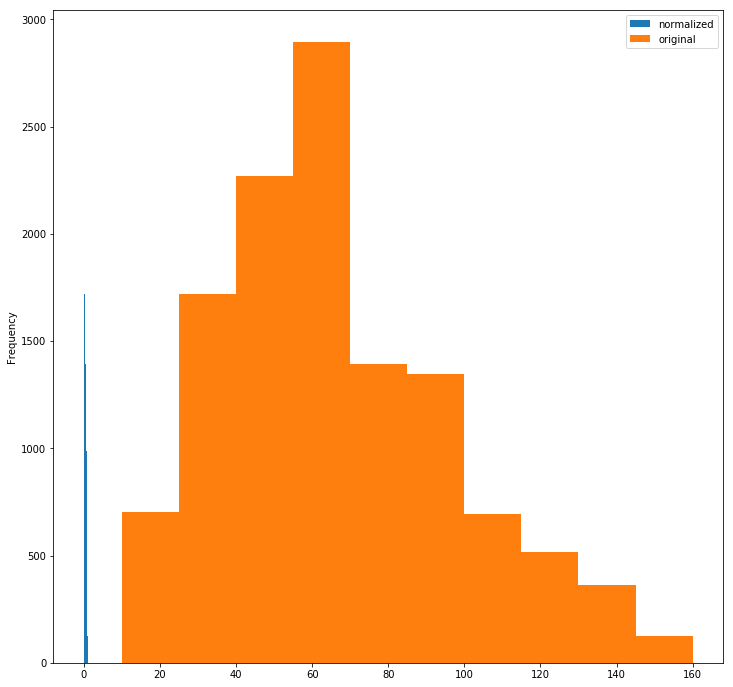

In [76]:
price_x_min = airDrop.price.min()
price_x_max = airDrop.price.max()

price_original = airDrop.price
price_normalized = price_original.apply(
    lambda x: (x-price_x_min) / (price_x_max - price_x_min))

price_normalized.plot.hist(label="normalized")
price_original.plot.hist(label="original")
plt.legend();

In [79]:
original_accommodates = airDrop.accommodates

accommodates_mu = original_accommodates.mean()
accommodates_sigma = original_accommodates.std()
accommodates_min = original_accommodates.min()
accommodates_max = original_accommodates.max()

accommodates_standardized = original_accommodates.apply(lambda x: (x-accommodates_mu)/accommodates_sigma)
accommodates_normalized = original_accommodates.apply(lambda x: (x-accommodates_min)/(accommodates_max - accommodates_min))

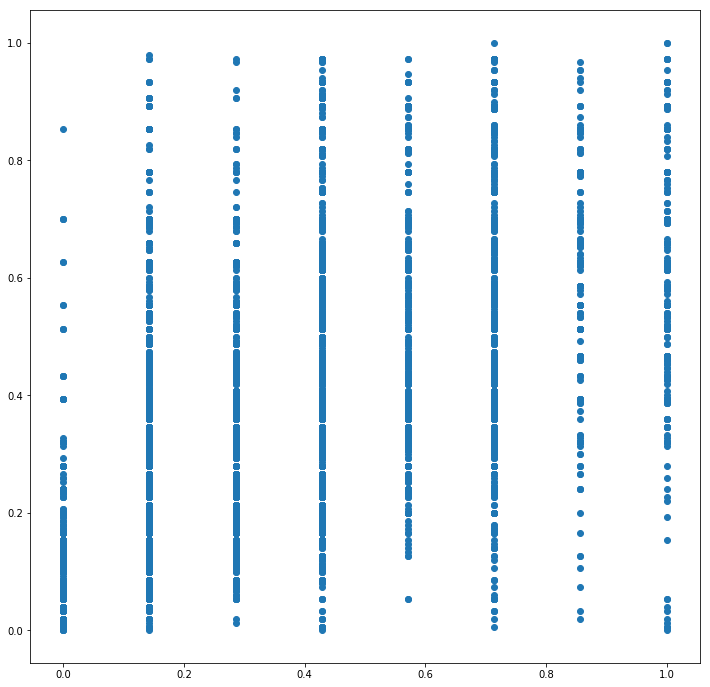

In [81]:
plt.scatter(x=accommodates_normalized,y=price_normalized, label="normalized")